In [34]:
import numpy as np
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib import rc
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D
import ternary
import warnings
import random

%matplotlib inline
warnings.filterwarnings('ignore')

# Fung et al., 2011 parameter ranges

**Coral Growth:** $r =  0.04–0.2 yr^{-1}$  *(Fung et al., 2011)*

**Coral Background Mortality:**  $mu =  0.02–0.1 yr^{-1}$  *(Fung et al., 2011)*

**Algal Growth Rate:** $gamma = 0.05–0.4 yr^{-1}$ *(Fung et al., 2011)*

**Growth Rate of Turf onto Free Space** $beta = 2–20 yr^{-1}$ *(Fung et al., 2011)*

**Growth rate of corals onto turf relative to the rate onto free space:** $alpha1 = 0.0-1.0$ *(Fung et al., 2011)*

**Growth rate of macroalgae onto turf relative to the rate onto free space** $alpha2 = 0–0.9$ *(Fung et al., 2011)* 

**Rate of macroalgae overgrowth onto coral relative to the rate onto free space** $alpha3 = 0–0.9$ *(Fung et al., 2011)*

# Model without p1, p2,  mu, nor fish


In [168]:
def dNdt(t, N, r, mu, gamma, beta, alpha1, alpha2, alpha3):
    
    C,M,T = N
    
    dC = (r*C*(1-C-M-T) + alpha1*r*C*T - alpha3*gamma*C*M)*dt
    dM = (gamma*M*(1-C-M-T) + alpha2*gamma*T*M + alpha3*gamma*C*M)*dt
    dT = (beta*T*(1-C-M-T) - alpha1*r*C*T - alpha2*gamma*T*M)*dt

    return dC, dM, dT

In [169]:
dt = 1
NUMSTEPS = 1000
NUMYEARS = int(NUMSTEPS/dt)
time_points = np.linspace(0, NUMYEARS, NUMSTEPS+1)

r = (0.04 + 0.2)/2 #coral growth
gamma = (0.05 + 0.4)/2 #macro algae growth rate over free space
beta = (2 + 20)/2 #turf growth rate onto free space
alpha1 = 1.0/2 #growth rate of corals onto turf relative to the rate onto free space
alpha2 = 0.9/2 #growth rate of macroalgae onto turf relative to the rate onto free space
alpha3 = 0.9/2 #rate of macroalgal overgrowth onto coral relative to the rate onto free space

C0 = 0.99
M0 = 0.005
T0 = 0.005

### Time series (to make sure 1,000 years is enough to reach equilibrium)

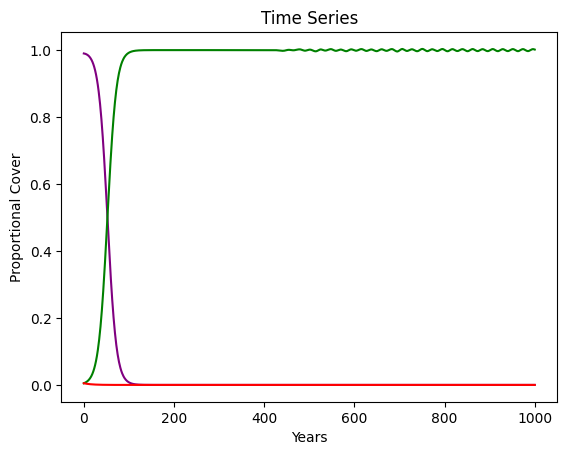

In [129]:
sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
N = sol.sol(time_points)

coral = N[0,:]
macroalgae = N[1,:]
turf = N[2,:]

plt.plot(time_points, coral, color = 'purple', label = 'coral')
plt.plot(time_points, macroalgae, color = "green", label = 'macroalgae')
plt.plot(time_points, turf, color = "red", label = 'turf')

plt.title("Time Series", fontsize = 12)
plt.xlabel("Years")
plt.ylabel("Proportional Cover");

### Exploring ecosystem outcomes across:
1. Increasing r (coral growth over free space)
2. Increasing gamma (macroalgae growth over free space)
3. Increasing beta (turf algae growth over free space)
4. Alpha1 (growth rate of coral onto turf, relative to free space)
5. Alpha2 (growth rate of macroalgae onto turf, relative to free space)
6. Alpha3 (growth rate of macroalgae onto coral, relative to free space)

### For this analysis, when one parameter was varied; all other parameters were held at their mid-range value. Also, C0 = 0.99, M0 = .005, and T0 = .005. 

In [130]:
#---------r-------------
r_outputs = []
r_outputs_prime = []

r_value = np.linspace(0.04, 0.2, 50)
r_value = np.round(r_value,2)

for r in r_value:

    if (C0 + M0 + T0 <= 1):
            
        sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
        N = sol.sol(time_points)

        C_array = N[0,:]
        M_array = N[1,:]
        T_array = N[2,:]

        r_outputs.append((C_array, M_array, T_array))
        r_outputs_prime.append((r, C_array[-1], M_array[-1], T_array[-1]))
        
#---------GAMMA-------------
gamma_outputs = []
gamma_outputs_prime = []

gamma_value = np.linspace(0.05, 0.4, 50)
gamma_value = np.round(gamma_value,2)

for gamma in gamma_value:

    if (C0 + M0 + T0 <= 1):
            
        sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
        N = sol.sol(time_points)

        C_array = N[0,:]
        M_array = N[1,:]
        T_array = N[2,:]

        gamma_outputs.append((C_array, M_array, T_array))
        gamma_outputs_prime.append((gamma, C_array[-1], M_array[-1], T_array[-1]))
        
#----------BETA------------
beta_outputs = []
beta_outputs_prime = []

beta_value = np.linspace(2, 20, 50)
beta_value = np.round(beta_value,2)

for beta in beta_value:

    if (C0 + M0 + T0 <= 1):
            
        sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
        N = sol.sol(time_points)

        C_array = N[0,:]
        M_array = N[1,:]
        T_array = N[2,:]

        beta_outputs.append((C_array, M_array, T_array))
        beta_outputs_prime.append((beta, C_array[-1], M_array[-1], T_array[-1]))
        
#---------ALPHA1-------------
alpha1_outputs = []
alpha1_outputs_prime = []

alpha1_value = np.linspace(0, 1.0, 50)
alpha1_value = np.round(alpha1_value,2)
   

for alpha1 in alpha1_value:

    if (C0 + M0 + T0 <= 1):
            
        sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
        N = sol.sol(time_points)

        C_array = N[0,:]
        M_array = N[1,:]
        T_array = N[2,:]

        alpha1_outputs.append((C_array, M_array, T_array))
        alpha1_outputs_prime.append((alpha1, C_array[-1], M_array[-1], T_array[-1]))
        
#---------ALPHA2-------------
alpha2_outputs = []
alpha2_outputs_prime = []

alpha2_value = np.linspace(0, 0.9, 50)
alpha2_value = np.round(alpha2_value,2)
   

for alpha2 in alpha2_value:

    if (C0 + M0 + T0 <= 1):
            
        sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
        N = sol.sol(time_points)

        C_array = N[0,:]
        M_array = N[1,:]
        T_array = N[2,:]

        alpha2_outputs.append((C_array, M_array, T_array))
        alpha2_outputs_prime.append((alpha2, C_array[-1], M_array[-1], T_array[-1]))

#---------ALPHA3-------------
alpha3_outputs = []
alpha3_outputs_prime = []

alpha3_value = np.linspace(0, 0.9, 50)
alpha3_value = np.round(alpha3_value,2)

for alpha3 in alpha3_value:

    if (C0 + M0 + T0 <= 1):
            
        sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
        N = sol.sol(time_points)

        C_array = N[0,:]
        M_array = N[1,:]
        T_array = N[2,:]

        alpha3_outputs.append((C_array, M_array, T_array))
        alpha3_outputs_prime.append((alpha3, C_array[-1], M_array[-1], T_array[-1]))

In [131]:
df_r = pd.DataFrame(r_outputs_prime, columns=['r','C_prime','M_prime','T_prime'])
df_gamma = pd.DataFrame(gamma_outputs_prime, columns=['gamma','C_prime','M_prime','T_prime'])
df_beta = pd.DataFrame(beta_outputs_prime, columns=['beta','C_prime','M_prime','T_prime'])
df_alpha1 = pd.DataFrame(alpha1_outputs_prime, columns=['alpha1','C_prime','M_prime','T_prime'])
df_alpha2 = pd.DataFrame(alpha2_outputs_prime, columns=['alpha2','C_prime','M_prime','T_prime'])
df_alpha3 = pd.DataFrame(alpha3_outputs_prime, columns=['alpha3','C_prime','M_prime','T_prime'])

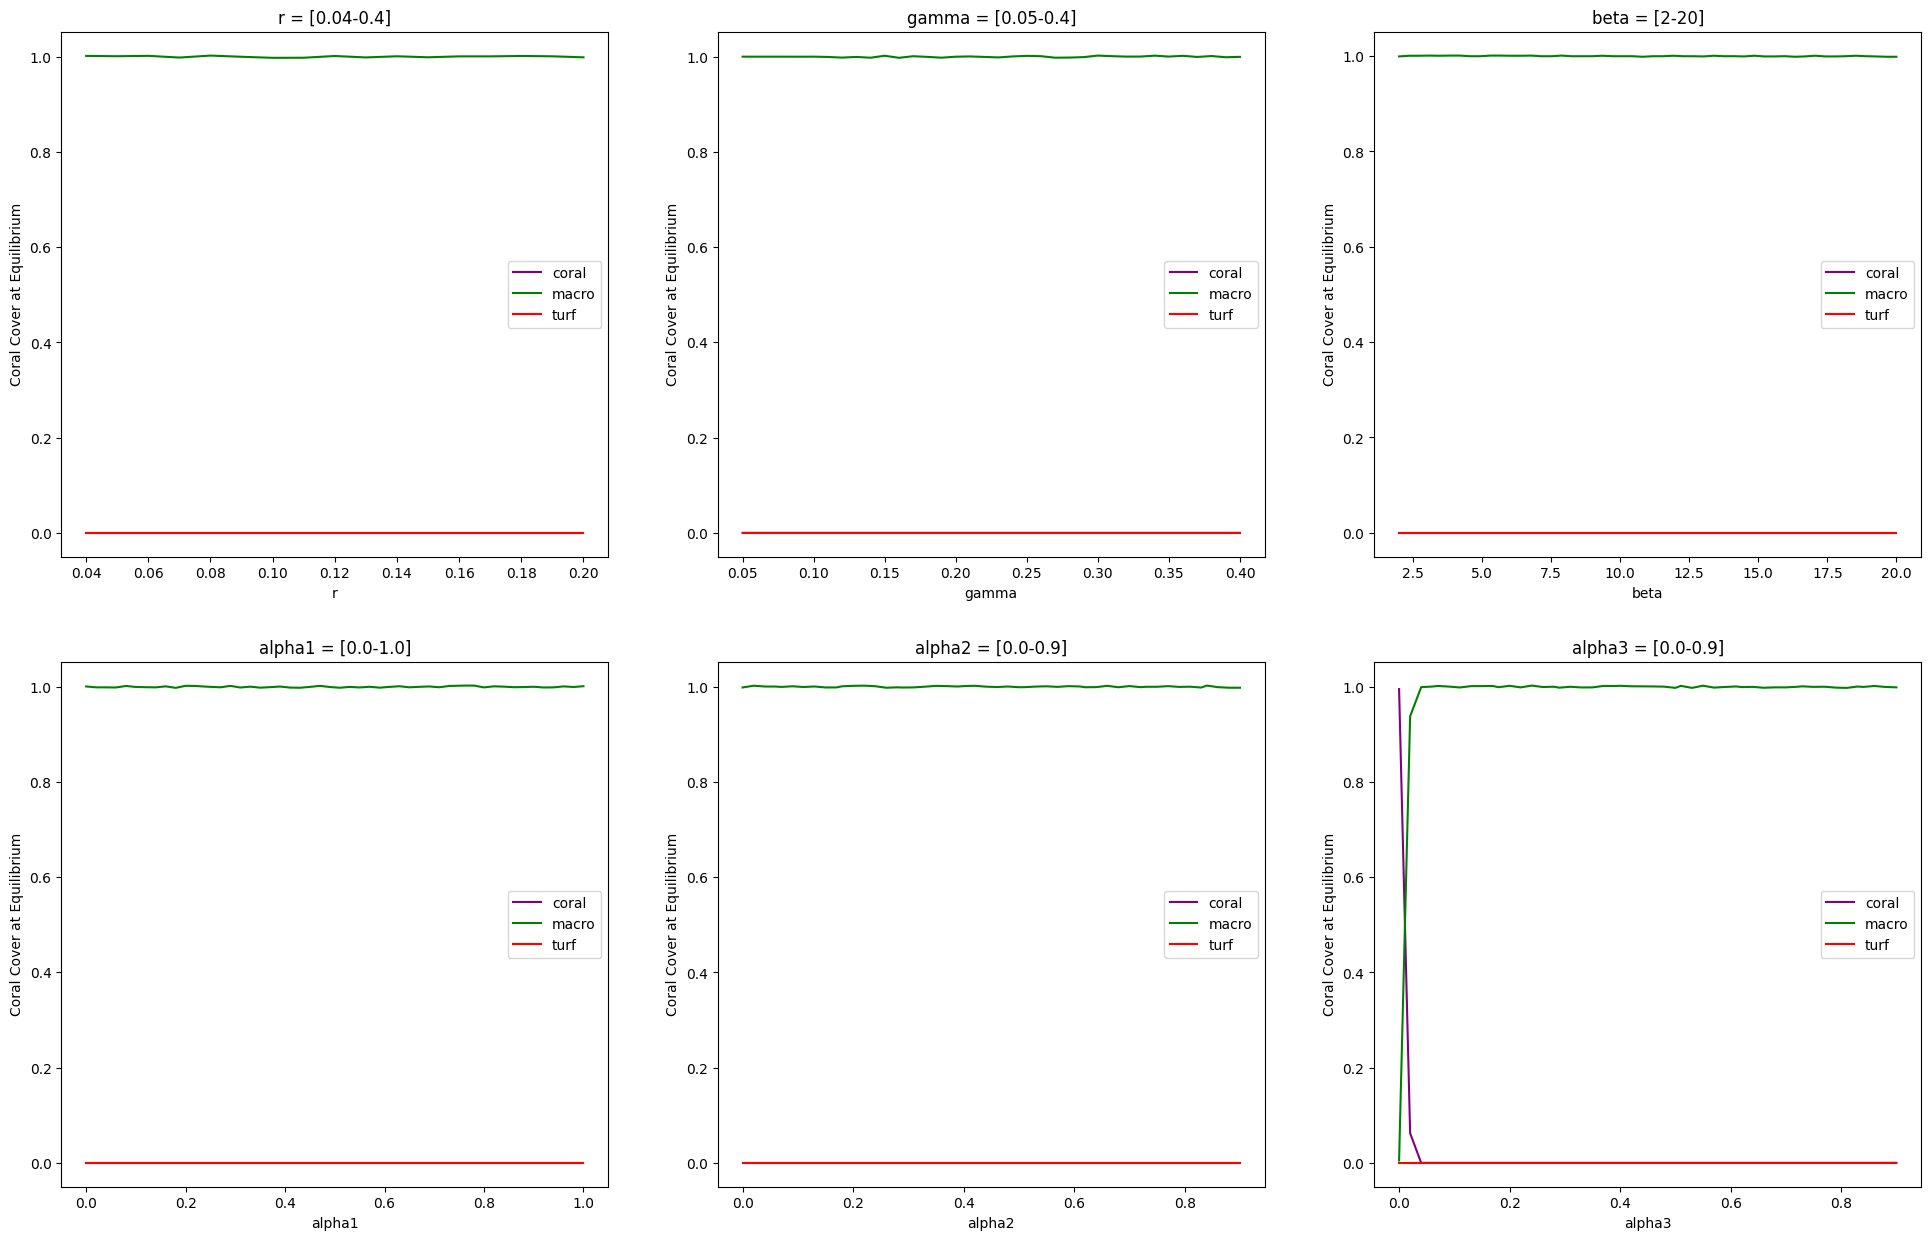

In [132]:
figure, axis = plt.subplots(2, 3, figsize=(24, 15))

#---------r-------------  
axis[0, 0].plot(df_r['r'], df_r['C_prime'], label = 'coral', c = 'purple')
axis[0, 0].plot(df_r['r'], df_r['M_prime'], label = 'macro', c = 'green')
axis[0, 0].plot(df_r['r'], df_r['T_prime'], label = 'turf', c = 'red')

axis[0, 0].set_title("r = [0.04-0.4]", fontsize = 12)
axis[0, 0].set_xlabel("r")
axis[0, 0].set_ylabel("Coral Cover at Equilibrium")
axis[0, 0].legend(); 

#---------GAMMA-------------  
axis[0, 1].plot(df_gamma['gamma'], df_gamma['C_prime'], label = 'coral', c = 'purple')
axis[0, 1].plot(df_gamma['gamma'], df_gamma['M_prime'], label = 'macro', c = 'green')
axis[0, 1].plot(df_gamma['gamma'], df_gamma['T_prime'], label = 'turf', c = 'red')

axis[0, 1].set_title("gamma = [0.05-0.4]", fontsize = 12)
axis[0, 1].set_xlabel("gamma")
axis[0, 1].set_ylabel("Coral Cover at Equilibrium")
axis[0, 1].legend(); 

#----------BETA------------
axis[0, 2].plot(df_beta['beta'], df_beta['C_prime'], label = 'coral', c = 'purple')
axis[0, 2].plot(df_beta['beta'], df_beta['M_prime'], label = 'macro', c = 'green')
axis[0, 2].plot(df_beta['beta'], df_beta['T_prime'], label = 'turf', c = 'red')

axis[0, 2].set_title("beta = [2-20]", fontsize = 12)
axis[0, 2].set_xlabel("beta")
axis[0, 2].set_ylabel("Coral Cover at Equilibrium")
axis[0, 2].legend(); 

#---------ALPHA1-------------
axis[1, 0].plot(df_alpha1['alpha1'], df_alpha1['C_prime'], label = 'coral', c = 'purple')
axis[1, 0].plot(df_alpha1['alpha1'], df_alpha1['M_prime'], label = 'macro', c = 'green')
axis[1, 0].plot(df_alpha1['alpha1'], df_alpha1['T_prime'], label = 'turf', c = 'red')
    
axis[1, 0].set_title("alpha1 = [0.0-1.0]", fontsize = 12)
axis[1, 0].set_xlabel("alpha1")
axis[1, 0].set_ylabel("Coral Cover at Equilibrium")
axis[1, 0].legend();

#---------ALPHA2-------------
axis[1, 1].plot(df_alpha2['alpha2'], df_alpha2['C_prime'], label = 'coral', c = 'purple')
axis[1, 1].plot(df_alpha2['alpha2'], df_alpha2['M_prime'], label = 'macro', c = 'green')
axis[1, 1].plot(df_alpha2['alpha2'], df_alpha2['T_prime'], label = 'turf', c = 'red')
    
axis[1, 1].set_title("alpha2 = [0.0-0.9]", fontsize = 12)
axis[1, 1].set_xlabel("alpha2")
axis[1, 1].set_ylabel("Coral Cover at Equilibrium")
axis[1, 1].legend();

#---------ALPHA3-------------
axis[1, 2].plot(df_alpha3['alpha3'], df_alpha3['C_prime'], label = 'coral', c = 'purple')
axis[1, 2].plot(df_alpha3['alpha3'], df_alpha3['M_prime'], label = 'macro', c = 'green')
axis[1, 2].plot(df_alpha3['alpha3'], df_alpha3['T_prime'], label = 'turf', c = 'red')

axis[1, 2].set_title("alpha3 = [0.0-0.9]", fontsize = 12)
axis[1, 2].set_xlabel("alpha3")
axis[1, 2].set_ylabel("Coral Cover at Equilibrium")
axis[1, 2].legend();

plt.show();

#### When death rates for turf, macroalgae, and coral are removed, and no fish are introduced into the model; it tends toward complete macroalgae dominance across all of the parameter spaces (as defined in Fung et al., 2011) of r, gamma, beta, alpha1, and alpha2. BUT, it appears coral can exist at low levels of alpha3.

#### Since all of the above runs only varied one parameter while holding the others at their mid-range value; the next step is to vary all parameters against one another simultaneously, across their full parameter space (as defined in Fung et al., 2011) .

### R x all parameters

In [136]:
#---------r x gamma-------------
r_gamma_outputs = []
r_gamma_outputs_prime = []

r_value = np.linspace(0.04, 0.2, 15)
r_value = np.round(r_value,2)

gamma_value = np.linspace(0.05, 0.4, 15)
gamma_value = np.round(gamma_value,2)

for r in r_value:
    
    for gamma in gamma_value:

        if (C0 + M0 + T0 <= 1):

            sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
            N = sol.sol(time_points) 

            C_array = N[0,:]
            M_array = N[1,:]
            T_array = N[2,:]

            r_gamma_outputs.append((C_array, M_array, T_array))
            r_gamma_outputs_prime.append((r, gamma, C_array[-1], M_array[-1], T_array[-1]))
            
#---------r x beta-------------
r_beta_outputs = []
r_beta_outputs_prime = []

r_value = np.linspace(0.04, 0.2, 15)
r_value = np.round(r_value,2)

beta_value = np.linspace(2, 20, 15)
beta_value = np.round(beta_value,2)

for r in r_value:
    
    for beta in beta_value:

        if (C0 + M0 + T0 <= 1):

            sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
            N = sol.sol(time_points) 

            C_array = N[0,:]
            M_array = N[1,:]
            T_array = N[2,:]

            r_beta_outputs.append((C_array, M_array, T_array))
            r_beta_outputs_prime.append((r, beta, C_array[-1], M_array[-1], T_array[-1]))

#---------r x alpha1-------------
r_alpha1_outputs = []
r_alpha1_outputs_prime = []

r_value = np.linspace(0.04, 0.2, 15)
r_value = np.round(r_value,2)

alpha1_value = np.linspace(0, 0.9, 15)
alpha1_value = np.round(alpha1_value,2)

for r in r_value:
    
    for alpha1 in alpha1_value:

        if (C0 + M0 + T0 <= 1):

            sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
            N = sol.sol(time_points) 

            C_array = N[0,:]
            M_array = N[1,:]
            T_array = N[2,:]

            r_alpha1_outputs.append((C_array, M_array, T_array))
            r_alpha1_outputs_prime.append((r, alpha1, C_array[-1], M_array[-1], T_array[-1]))

#---------r x alpha2-------------
r_alpha2_outputs = []
r_alpha2_outputs_prime = []

r_value = np.linspace(0.04, 0.2, 15)
r_value = np.round(r_value,2)

alpha2_value = np.linspace(0, 0.9, 15)
alpha2_value = np.round(alpha2_value,2)

for r in r_value:
    
    for alpha2 in alpha2_value:

        if (C0 + M0 + T0 <= 1):

            sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
            N = sol.sol(time_points) 

            C_array = N[0,:]
            M_array = N[1,:]
            T_array = N[2,:]

            r_alpha2_outputs.append((C_array, M_array, T_array))
            r_alpha2_outputs_prime.append((r, alpha2, C_array[-1], M_array[-1], T_array[-1]))
            
#---------r x alpha3-------------
r_alpha3_outputs = []
r_alpha3_outputs_prime = []

r_value = np.linspace(0.04, 0.2, 15)
r_value = np.round(r_value,2)

alpha3_value = np.linspace(0, 0.9, 15)
alpha3_value = np.round(alpha3_value,2)

for r in r_value:
    
    for alpha3 in alpha3_value:

        if (C0 + M0 + T0 <= 1):

            sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
            N = sol.sol(time_points) 

            C_array = N[0,:]
            M_array = N[1,:]
            T_array = N[2,:]

            r_alpha3_outputs.append((C_array, M_array, T_array))
            r_alpha3_outputs_prime.append((r, alpha3, C_array[-1], M_array[-1], T_array[-1]))

In [137]:
df_r_gamma = pd.DataFrame(r_gamma_outputs_prime, columns=['r','gamma','C_prime','M_prime','T_prime'])
df_r_beta = pd.DataFrame(r_beta_outputs_prime, columns=['r','beta','C_prime','M_prime','T_prime'])
df_r_alpha1 = pd.DataFrame(r_alpha1_outputs_prime, columns=['r','alpha1','C_prime','M_prime','T_prime'])
df_r_alpha2 = pd.DataFrame(r_alpha2_outputs_prime, columns=['r','alpha2','C_prime','M_prime','T_prime'])
df_r_alpha3 = pd.DataFrame(r_alpha3_outputs_prime, columns=['r','alpha3','C_prime','M_prime','T_prime'])

### Gamma x remaining parameters

In [148]:
#---------gamma x beta-------------
gamma_beta_outputs = []
gamma_beta_outputs_prime = []

gamma_value = np.linspace(0.05, 0.4, 15)
gamma_value = np.round(gamma_value,2)

beta_value = np.linspace(2, 20, 15)
beta_value = np.round(beta_value,2)

for gamma in gamma_value:
    
    for beta in beta_value:

        if (C0 + M0 + T0 <= 1):

            sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
            N = sol.sol(time_points) 

            C_array = N[0,:]
            M_array = N[1,:]
            T_array = N[2,:]

            gamma_beta_outputs.append((C_array, M_array, T_array))
            gamma_beta_outputs_prime.append((gamma, beta, C_array[-1], M_array[-1], T_array[-1]))

#---------gamma x alpha1-------------
gamma_alpha1_outputs = []
gamma_alpha1_outputs_prime = []

gamma_value = np.linspace(0.05, 0.4, 15)
gamma_value = np.round(gamma_value,2)

alpha1_value = np.linspace(0, 0.9, 15)
alpha1_value = np.round(alpha1_value,2)

for gamma in gamma_value:
    
    for alpha1 in alpha1_value:

        if (C0 + M0 + T0 <= 1):

            sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
            N = sol.sol(time_points) 

            C_array = N[0,:]
            M_array = N[1,:]
            T_array = N[2,:]

            gamma_alpha1_outputs.append((C_array, M_array, T_array))
            gamma_alpha1_outputs_prime.append((gamma, alpha1, C_array[-1], M_array[-1], T_array[-1]))

#---------gamma x alpha2-------------
gamma_alpha2_outputs = []
gamma_alpha2_outputs_prime = []

gamma_value = np.linspace(0.05, 0.4, 15)
gamma_value = np.round(gamma_value,2)

alpha2_value = np.linspace(0, 0.9, 15)
alpha2_value = np.round(alpha2_value,2)

for gamma in gamma_value:
    
    for alpha2 in alpha2_value:

        if (C0 + M0 + T0 <= 1):

            sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
            N = sol.sol(time_points) 

            C_array = N[0,:]
            M_array = N[1,:]
            T_array = N[2,:]

            gamma_alpha2_outputs.append((C_array, M_array, T_array))
            gamma_alpha2_outputs_prime.append((gamma, alpha2, C_array[-1], M_array[-1], T_array[-1]))
            
#---------gamma x alpha3-------------
gamma_alpha3_outputs = []
gamma_alpha3_outputs_prime = []

gamma_value = np.linspace(0.05, 0.4, 15)
gamma_value = np.round(gamma_value,2)

alpha3_value = np.linspace(0, 0.9, 15)
alpha3_value = np.round(alpha3_value,2)

for gamma in gamma_value:
    
    for alpha3 in alpha3_value:

        if (C0 + M0 + T0 <= 1):

            sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
            N = sol.sol(time_points) 

            C_array = N[0,:]
            M_array = N[1,:]
            T_array = N[2,:]

            gamma_alpha3_outputs.append((C_array, M_array, T_array))
            gamma_alpha3_outputs_prime.append((gamma, alpha3, C_array[-1], M_array[-1], T_array[-1]))

In [149]:
df_gamma_beta = pd.DataFrame(gamma_beta_outputs_prime, columns=['gamma','beta','C_prime','M_prime','T_prime'])
df_gamma_alpha1 = pd.DataFrame(gamma_alpha1_outputs_prime, columns=['gamma','alpha1','C_prime','M_prime','T_prime'])
df_gamma_alpha2 = pd.DataFrame(gamma_alpha2_outputs_prime, columns=['gamma','alpha2','C_prime','M_prime','T_prime'])
df_gamma_alpha3 = pd.DataFrame(gamma_alpha3_outputs_prime, columns=['gamma','alpha3','C_prime','M_prime','T_prime'])

### Beta x remaining parameters

In [170]:
#---------beta x alpha1-------------
beta_alpha1_outputs = []
beta_alpha1_outputs_prime = []

beta_value = np.linspace(2, 20, 15)
beta_value = np.round(beta_value,2)

alpha1_value = np.linspace(0, 0.9, 15)
alpha1_value = np.round(alpha1_value,2)

for beta in beta_value:
    
    for alpha1 in alpha1_value:

        if (C0 + M0 + T0 <= 1):

            sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
            N = sol.sol(time_points) 

            C_array = N[0,:]
            M_array = N[1,:]
            T_array = N[2,:]

            beta_alpha1_outputs.append((C_array, M_array, T_array))
            beta_alpha1_outputs_prime.append((beta, alpha1, C_array[-1], M_array[-1], T_array[-1]))

#---------beta x alpha2-------------
beta_alpha2_outputs = []
beta_alpha2_outputs_prime = []

beta_value = np.linspace(2, 20, 15)
beta_value = np.round(beta_value,2)

alpha2_value = np.linspace(0, 0.9, 15)
alpha2_value = np.round(alpha2_value,2)

for beta in beta_value:
    
    for alpha2 in alpha2_value:

        if (C0 + M0 + T0 <= 1):

            sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
            N = sol.sol(time_points) 

            C_array = N[0,:]
            M_array = N[1,:]
            T_array = N[2,:]

            beta_alpha2_outputs.append((C_array, M_array, T_array))
            beta_alpha2_outputs_prime.append((beta, alpha2, C_array[-1], M_array[-1], T_array[-1]))
            
#---------beta x alpha3-------------
beta_alpha3_outputs = []
beta_alpha3_outputs_prime = []

beta_value = np.linspace(2, 20, 15)
beta_value = np.round(beta_value,2)

alpha3_value = np.linspace(0, 0.9, 15)
alpha3_value = np.round(alpha3_value,2)

for beta in beta_value:
    
    for alpha3 in alpha3_value:

        if (C0 + M0 + T0 <= 1):

            sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
            N = sol.sol(time_points) 

            C_array = N[0,:]
            M_array = N[1,:]
            T_array = N[2,:]

            beta_alpha3_outputs.append((C_array, M_array, T_array))
            beta_alpha3_outputs_prime.append((beta, alpha3, C_array[-1], M_array[-1], T_array[-1]))

In [172]:
df_beta_alpha1 = pd.DataFrame(beta_alpha1_outputs_prime, columns=['beta','alpha1','C_prime','M_prime','T_prime'])
df_beta_alpha2 = pd.DataFrame(beta_alpha2_outputs_prime, columns=['beta','alpha2','C_prime','M_prime','T_prime'])
df_beta_alpha3 = pd.DataFrame(beta_alpha3_outputs_prime, columns=['beta','alpha3','C_prime','M_prime','T_prime'])

### alpha1 x remaining parameters

In [175]:
#---------alpha1 x alpha2-------------
alpha1_alpha2_outputs = []
alpha1_alpha2_outputs_prime = []

alpha1_value = np.linspace(0, 0.9, 15)
alpha1_value = np.round(alpha1_value,2)

alpha2_value = np.linspace(0, 0.9, 15)
alpha2_value = np.round(alpha2_value,2)

for alpha1 in alpha1_value:
    
    for alpha2 in alpha2_value:

        if (C0 + M0 + T0 <= 1):

            sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
            N = sol.sol(time_points) 

            C_array = N[0,:]
            M_array = N[1,:]
            T_array = N[2,:]

            alpha1_alpha2_outputs.append((C_array, M_array, T_array))
            alpha1_alpha2_outputs_prime.append((alpha1, alpha2, C_array[-1], M_array[-1], T_array[-1]))
            
#---------alpha1 x alpha3-------------
alpha1_alpha3_outputs = []
alpha1_alpha3_outputs_prime = []

alpha1_value = np.linspace(0, 0.9, 15)
alpha1_value = np.round(alpha1_value,2)

alpha3_value = np.linspace(0, 0.9, 15)
alpha3_value = np.round(alpha3_value,2)

for alpha1 in alpha1_value:
    
    for alpha3 in alpha3_value:

        if (C0 + M0 + T0 <= 1):

            sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
            N = sol.sol(time_points) 

            C_array = N[0,:]
            M_array = N[1,:]
            T_array = N[2,:]

            alpha1_alpha3_outputs.append((C_array, M_array, T_array))
            alpha1_alpha3_outputs_prime.append((alpha1, alpha3, C_array[-1], M_array[-1], T_array[-1]))

In [176]:
df_alpha1_alpha2 = pd.DataFrame(alpha1_alpha2_outputs_prime, columns=['alpha1','alpha2','C_prime','M_prime','T_prime'])
df_alpha1_alpha3 = pd.DataFrame(alpha1_alpha3_outputs_prime, columns=['alpha1','alpha3','C_prime','M_prime','T_prime'])

### alpha2 x alpha3

In [190]:
#---------alpha3 x alpha2-------------
alpha3_alpha2_outputs = []
alpha3_alpha2_outputs_prime = []

alpha3_value = np.linspace(0, 0.9, 15)
alpha3_value = np.round(alpha3_value,2)

alpha2_value = np.linspace(0, 0.9, 15)
alpha2_value = np.round(alpha2_value,2)

for alpha3 in alpha3_value:
    
    for alpha2 in alpha2_value:

        if (C0 + M0 + T0 <= 1):

            sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
            N = sol.sol(time_points) 

            C_array = N[0,:]
            M_array = N[1,:]
            T_array = N[2,:]

            alpha3_alpha2_outputs.append((C_array, M_array, T_array))
            alpha3_alpha2_outputs_prime.append((alpha3, alpha2, C_array[-1], M_array[-1], T_array[-1]))

In [191]:
df_alpha3_alpha2 = pd.DataFrame(alpha3_alpha2_outputs_prime, columns=['alpha3','alpha2','C_prime','M_prime','T_prime'])

### Plotting!

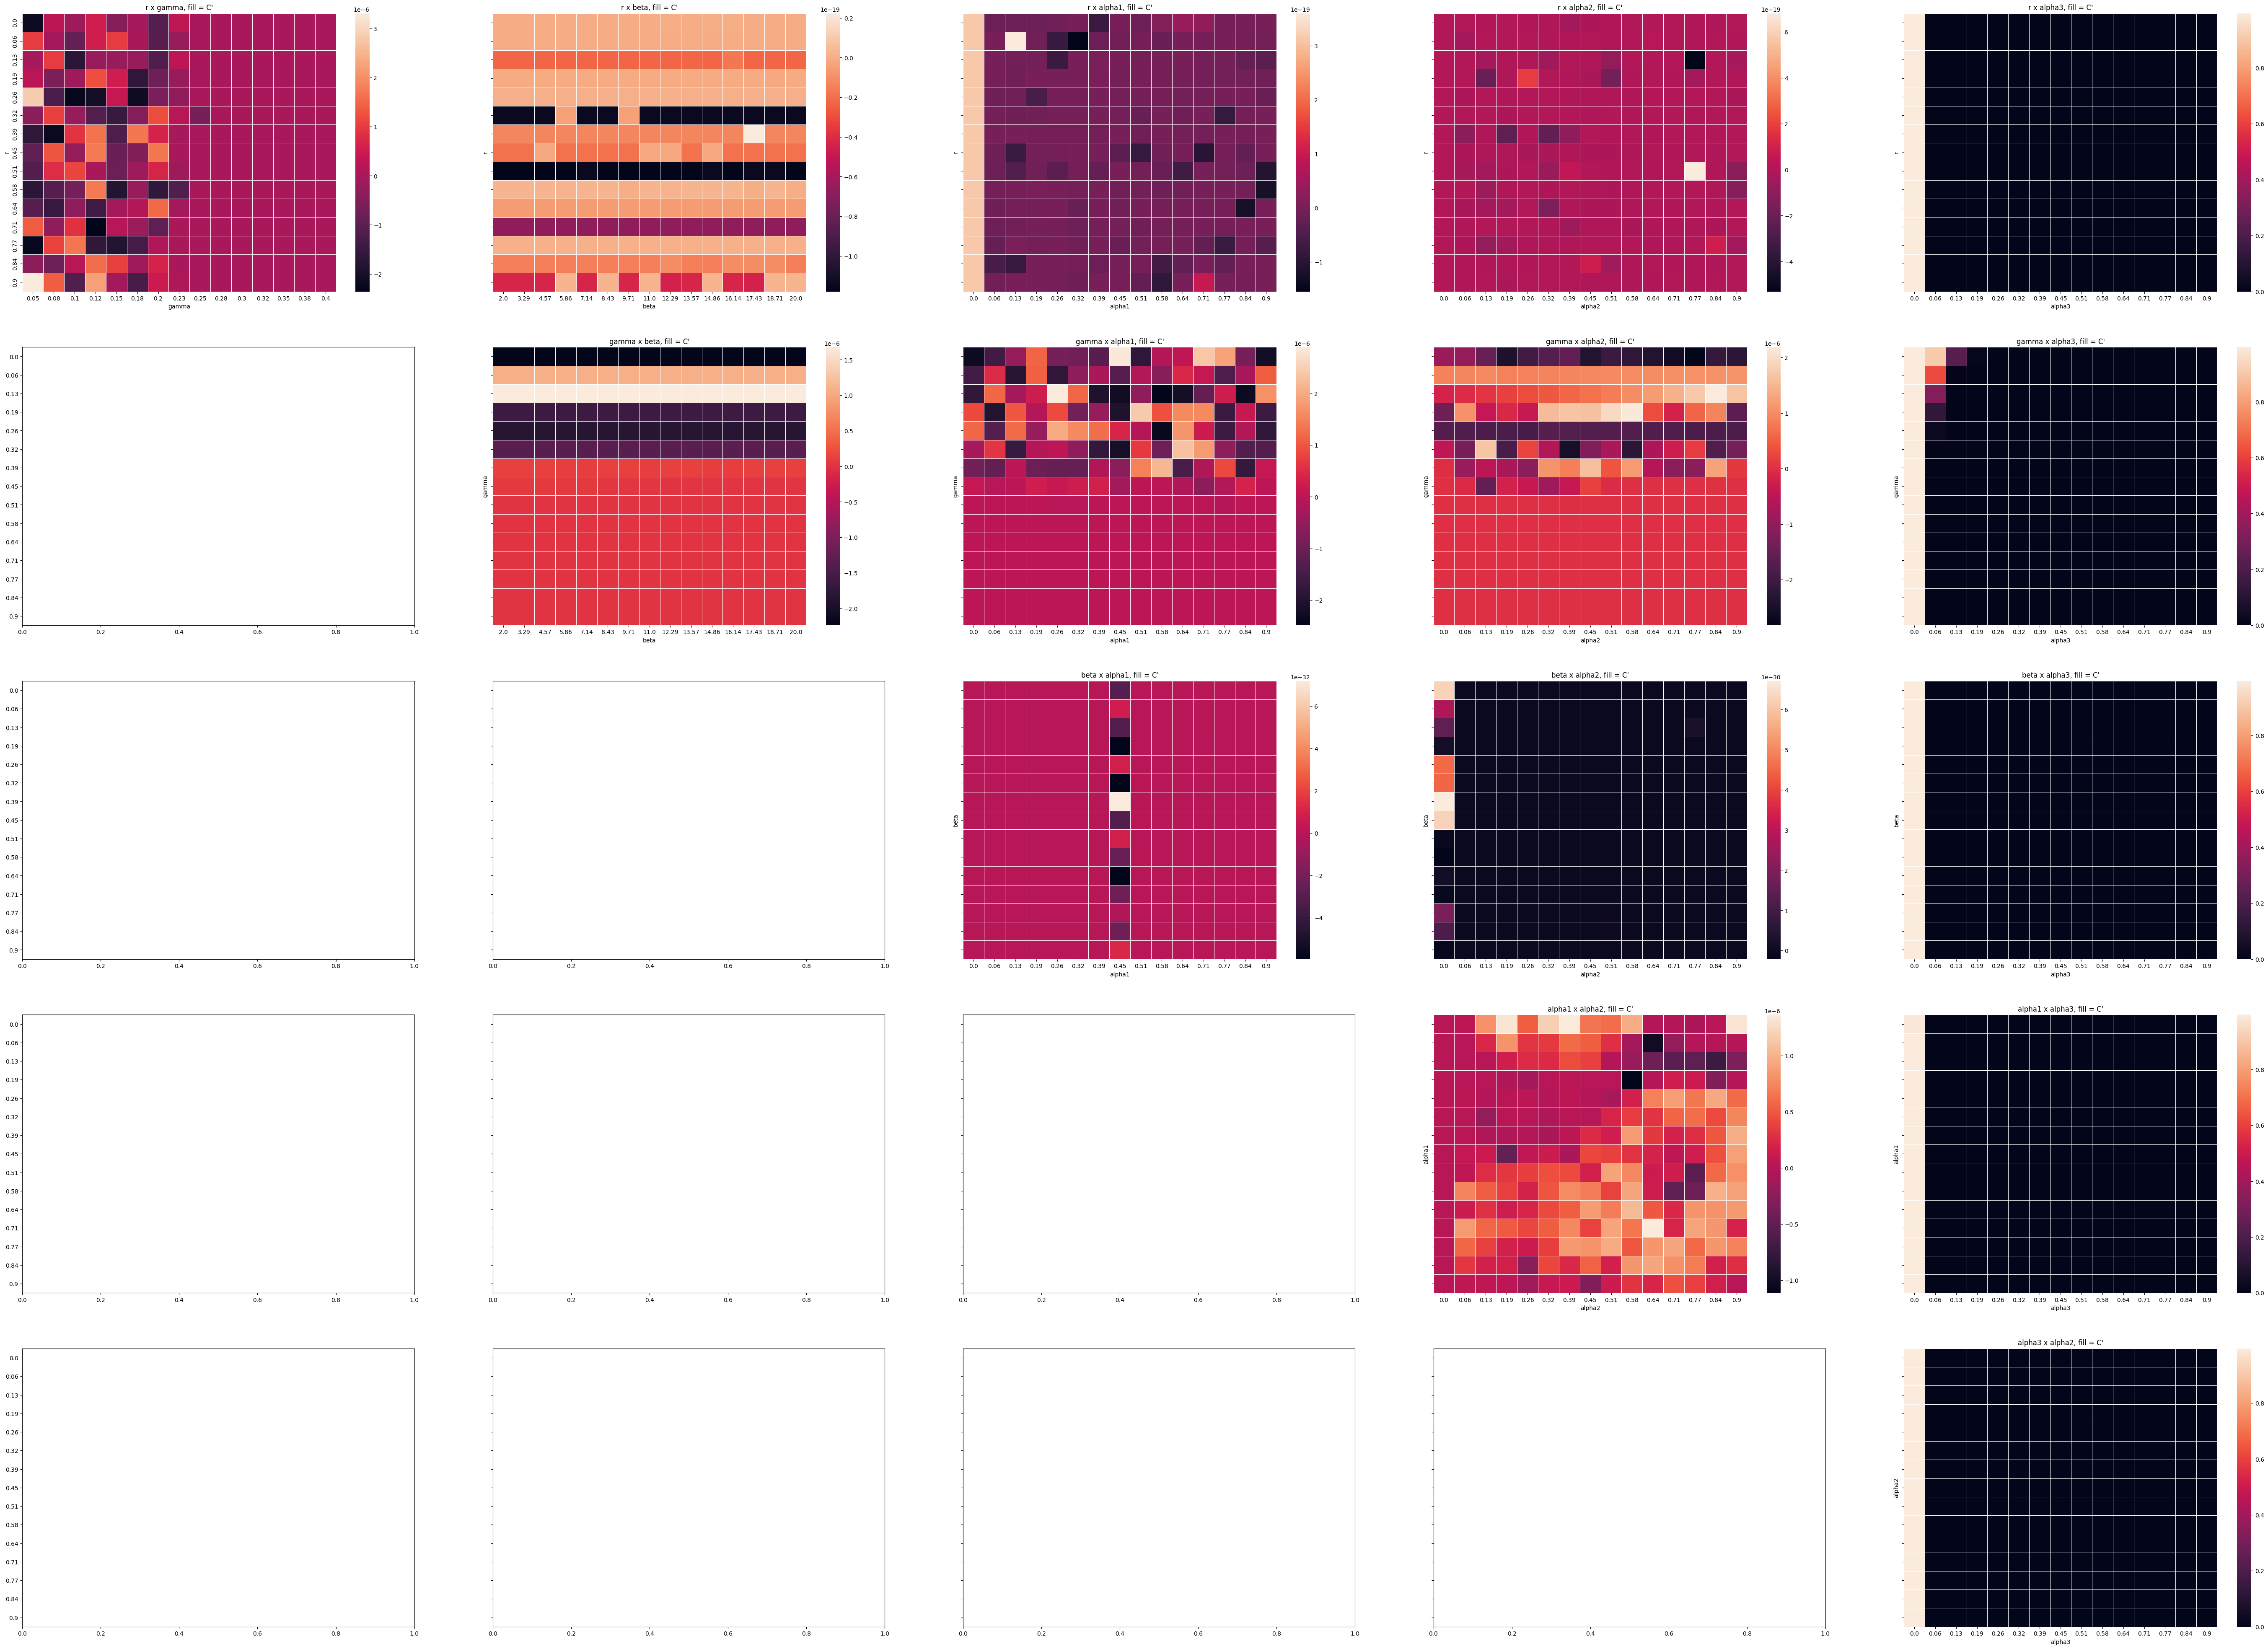

In [210]:
figure, ax = plt.subplots(ncols=5, nrows = 5, sharey=True, figsize=(70, 50))

#---------r x gamma-------------  
r_gamma_heatmap = (
    df_r_gamma
    .pivot(index = "r", columns = "gamma", values = "C_prime"))

sns.heatmap(r_gamma_heatmap, annot=False, linewidths=.5, ax=ax[0,0])
ax[0,0].set_title("r x gamma, fill = C'");

#---------r x beta-------------  
r_beta_heatmap = (
    df_r_beta
    .pivot(index = "r", columns = "beta", values = "C_prime"))

sns.heatmap(r_beta_heatmap, annot=False, linewidths=.5, ax=ax[0,1])
ax[0,1].set_title("r x beta, fill = C'");

#---------r x alpha1-------------  
r_alpha1_heatmap = (
    df_r_alpha1
    .pivot(index = "r", columns = "alpha1", values = "C_prime"))

sns.heatmap(r_alpha1_heatmap, annot=False, linewidths=.5, ax=ax[0,2])
ax[0,2].set_title("r x alpha1, fill = C'");

#---------r x alpha2-------------  
r_alpha2_heatmap = (
    df_r_alpha2
    .pivot(index = "r", columns = "alpha2", values = "C_prime"))

sns.heatmap(r_alpha2_heatmap, annot=False, linewidths=.5, ax=ax[0,3])
ax[0,3].set_title("r x alpha2, fill = C'");

#---------r x alpha3-------------  
r_alpha3_heatmap = (
    df_r_alpha3
    .pivot(index = "r", columns = "alpha3", values = "C_prime"))

sns.heatmap(r_alpha3_heatmap, annot=False, linewidths=.5, ax=ax[0,4])
ax[0,4].set_title("r x alpha3, fill = C'")

figure.savefig("gamma x all parameters");

#---------gamma x beta-------------  
gamma_beta_heatmap = (
    df_gamma_beta
    .pivot(index = "gamma", columns = "beta", values = "C_prime"))

sns.heatmap(gamma_beta_heatmap, annot=False, linewidths=.5, ax=ax[1,1])
ax[1,1].set_title("gamma x beta, fill = C'");

#---------gamma x alpha1-------------  
gamma_alpha1_heatmap = (
    df_gamma_alpha1
    .pivot(index = "gamma", columns = "alpha1", values = "C_prime"))

sns.heatmap(gamma_alpha1_heatmap, annot=False, linewidths=.5, ax=ax[1,2])
ax[1,2].set_title("gamma x alpha1, fill = C'");

#---------gamma x alpha2-------------  
gamma_alpha2_heatmap = (
    df_gamma_alpha2
    .pivot(index = "gamma", columns = "alpha2", values = "C_prime"))

sns.heatmap(gamma_alpha2_heatmap, annot=False, linewidths=.5, ax=ax[1,3])
ax[1,3].set_title("gamma x alpha2, fill = C'");

#---------gamma x alpha3-------------  
gamma_alpha3_heatmap = (
    df_gamma_alpha3
    .pivot(index = "gamma", columns = "alpha3", values = "C_prime"))

sns.heatmap(gamma_alpha3_heatmap, annot=False, linewidths=.5, ax=ax[1,4])
ax[1,4].set_title("gamma x alpha3, fill = C'");

#---------beta x alpha1-------------  
beta_alpha1_heatmap = (
    df_beta_alpha1
    .pivot(index = "beta", columns = "alpha1", values = "C_prime"))

sns.heatmap(beta_alpha1_heatmap, annot=False, linewidths=.5, ax=ax[2,2])
ax[2,2].set_title("beta x alpha1, fill = C'");

#---------beta x alpha2-------------  
beta_alpha2_heatmap = (
    df_beta_alpha2
    .pivot(index = "beta", columns = "alpha2", values = "C_prime"))

sns.heatmap(beta_alpha2_heatmap, annot=False, linewidths=.5, ax=ax[2,3])
ax[2,3].set_title("beta x alpha2, fill = C'");

#---------beta x alpha3-------------  
beta_alpha3_heatmap = (
    df_beta_alpha3
    .pivot(index = "beta", columns = "alpha3", values = "C_prime"))

sns.heatmap(beta_alpha3_heatmap, annot=False, linewidths=.5, ax=ax[2,4])
ax[2,4].set_title("beta x alpha3, fill = C'");

#---------alpha1 x alpha2-------------  
alpha1_alpha2_heatmap = (
    df_alpha1_alpha2
    .pivot(index = "alpha1", columns = "alpha2", values = "C_prime"))

sns.heatmap(alpha1_alpha2_heatmap, annot=False, linewidths=.5, ax=ax[3,3])
ax[3,3].set_title("alpha1 x alpha2, fill = C'");

#---------alpha1 x alpha3-------------  
alpha1_alpha3_heatmap = (
    df_alpha1_alpha3
    .pivot(index = "alpha1", columns = "alpha3", values = "C_prime"))

sns.heatmap(alpha1_alpha3_heatmap, annot=False, linewidths=.5, ax=ax[3,4])
ax[3,4].set_title("alpha1 x alpha3, fill = C'");

#---------alpha3 x alpha2-------------  
alpha3_alpha2_heatmap = (
    df_alpha3_alpha2
    .pivot(index = "alpha2", columns = "alpha3", values = "C_prime"))

sns.heatmap(alpha3_alpha2_heatmap, annot=False, linewidths=.5, ax=ax[4,4])
ax[4,4].set_title("alpha3 x alpha2, fill = C'");


figure.savefig("parameter cross-analyses");